# Final Project

In [12]:
import numpy as np
brightness = np.array([1.3563500068194456,
 1.3618671461634961,
 1.362309289991296,
 1.364986374097346,
 1.3570395233235044,
 1.3651715055240161,
 1.362157530823828,
 1.3644821235911027,
 1.3678429737040994,
 1.3678720481713442,
 1.3602235623934191,
 1.3627122911688387,
 1.3657571470544143,
 1.3634077454198628,
 1.359742426634922,
 1.3713282970326586,
 1.3691443824039122,
 1.371618514991893,
 1.3724878537026228,
 1.3643212589565339,
 1.3642653074180902,
 1.3680508968018534,
 1.3672795965562874,
 1.3652986784270178,
 1.3718234482730722,
 1.3641102914384686,
 1.3640285893938047,
 1.3664681079601984,
 1.3681818812366244,
 1.366194333093337,
 1.3655701498541746,
 1.3643508920609864,
 1.3674341301247612,
 1.3645917946319084,
 1.3633319538614408,
 1.3714793333245374,
 1.3624017445176573,
 1.3707928118474126,
 1.3724979300181817,
 1.3637264580744282,
 1.3627377964913063,
 1.3618342236521224,
 1.366018253856429,
 1.3689098707090017,
 1.3681167543260349,
 1.3731508972873632,
 1.3725756172520256,
 1.3660814057973394,
 1.3728533289946498,
 1.3680738945450397,
 1.3746448599760697,
 1.3744108720551405,
 1.3618734858820332,
 1.369185884791085,
 1.367749868267674,
 1.3689390242861454,
 1.3740014098097657,
 1.3743579890046125,
 1.3752100561397853,
 1.3735114541675661,
 1.371266055636104,
 1.3776130735188585,
 1.376246121530785,
 1.3760100191935698,
 1.3774451737127722,
 1.3778824144782755,
 1.3637087696372192,
 1.3701788939437924,
 1.3738420314581312,
 1.378707072502084,
 1.3763336744019914,
 1.37861644264931,
 1.375009168350086,
 1.3626252871980533,
 1.3696337853732394,
 1.372710748551433,
 1.376580795665147,
 1.3753429634902332,
 1.3764130832710222,
 1.3820042873753018,
 1.3740201288460763,
 1.3704204120228483,
 1.377243135373259,
 1.3758727142789344,
 1.3732189117654994,
 1.3715828213333698,
 1.3725690343461663,
 1.3753540351876041,
 1.3671458335804365,
 1.364525632127842,
 1.3749892069068628,
 1.3633691160593404,
 1.3711774725779287,
 1.3726425287970263,
 1.3745555914623606,
 1.3690736993024555,
 1.3667427894168631,
 1.3766232577819115,
 1.3716152709289373,
 1.3751758215157888,
 1.3760422454953514,
 1.3694571107044553,
 1.3772432937422912,
 1.3713077371582894,
 1.3680651116924125,
 1.3742381268061135,
 1.3743687626840158,
 1.3664736794598675,
 1.3843681256003997,
 1.36825538294414,
 1.3723407630593276,
 1.3665523727422664,
 1.3695065601856355,
 1.3811678928533293,
 1.3612601140930107,
 1.3655830325301062,
 1.368347439605655,
 1.372466415659633,
 1.368480513325101,
 1.3700580291091078,
 1.3652777176435507,
 1.375870970690053,
 1.3714772861563218,
 1.3751717947025714])

In [13]:
from statistics import stdev

# Find the standard deviation of the numbers
std_dev_sq_inv = stdev(brightness)**-2

# Print the standard deviation
print(std_dev_sq_inv)

33554.067072465135


In [14]:
#record best
#best_sol_dir='best.npy'
#np.save(best_sol_dir, np.array([-np.inf,0,0,0]))

In [15]:
import emcee
def lnlike(theta):
    slope, turn_point, flat = theta
    output = 0
    for i in range(len(brightness)):
        if i >= turn_point:
            output += (brightness[i]-flat)**2
        else:
            output += (brightness[i]-flat+slope*(turn_point-i))**2
    output *= -std_dev_sq_inv
    '''
    global best_sol_dir
    try:best_sol = np.load(best_sol_dir,)
    except:return(output)
    if output>best_sol[0]:
        best_sol[0]=output
        best_sol[1:]=theta
        print(best_sol)
        np.save(best_sol_dir, best_sol)
    '''
    return(output)

In [16]:
def lnprior(theta):
    if 0<theta[0]<0.0003 and 0<theta[1]<125 and 1.355<theta[2]<1.385:
        return 0
    return -np.inf
    
def lnprob(theta):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [17]:
#random position
pos = np.random.rand(512, 3)*[0.0003,125,0.03]+np.ones((512, 3))*[0,0,1.355]
nwalkers, ndim = pos.shape
filename = "Best_fit.h5"
knn_backend = emcee.backends.HDFBackend(filename, name="Best_fit")
# Don't forget to clear it in case the file already exists
#mcfost_backend.reset(nwalkers, ndim)

In [18]:
#run mcmc
from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "12"
steps = 10000
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, pool=pool, backend=knn_backend)
    sampler.run_mcmc(pos, steps, progress=True)

100%|█████████████████████████████████████| 10000/10000 [01:47<00:00, 93.37it/s]


Text(0.5, 0, 'step number')

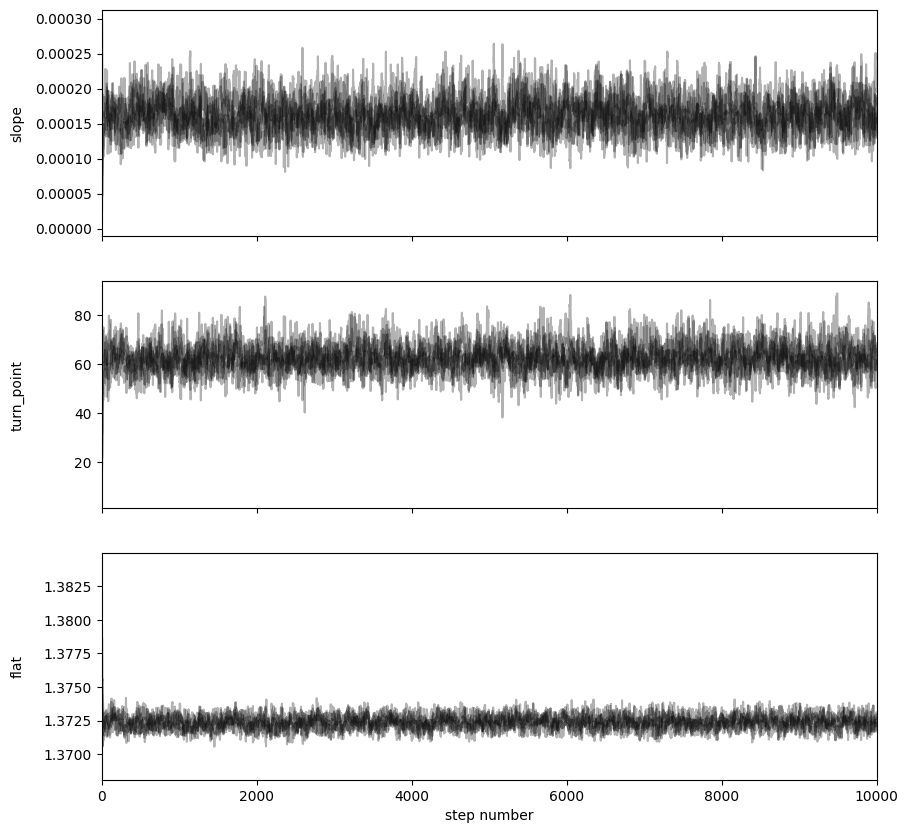

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, figsize=(10, 10), sharex=True)
samples = sampler.get_chain()
labels = ["slope", "turn_point", "flat"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, ::100, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")

In [20]:
np.max(sampler.get_log_prob()), np.argmax(sampler.get_log_prob())

(-77.79894486348142, 944784)

In [21]:
sampler.get_chain(discard=0, thin=1, flat=True)[np.argmax(sampler.get_log_prob())]

array([1.63116853e-04, 6.20118136e+01, 1.37238328e+00])

In [33]:
sampler.get_autocorr_time(tol=0)

array([37.1608906 , 35.79059453, 34.03959357])

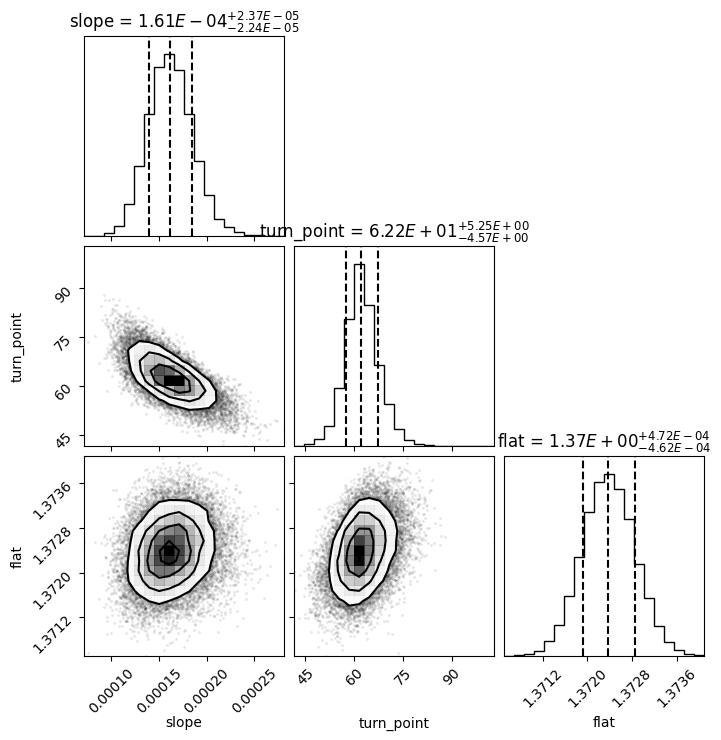

In [32]:
import corner
flat_samples = sampler.get_chain(discard=5000, thin=100, flat=True)
fig = corner.corner(flat_samples,
                    labels=labels,
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_fmt=".2E")
plt.savefig("orig_corner.png")